### CIFAR-10 CNN Project

##### How to work through this project:
- Go cell by cell and finish the marked #TODO's
- You don't need to touch the code marked between the `#---------#`. Those are puzzle pieces that your code will fit into!
    - However, I **STRONGLY** encourage you to understand every single line between those blocks. They are essential!
    - It is crucial that your variable names are what we expect them to be, or the puzzle pieces won't fit.
- Tutorials/helpful information will be placed in the `.md` cells above the "work" cells. Consult them if you are stuck.
- If you REALLY cannot find the correct code to make the cell run, consult the `[proj]-ans.ipynb`.
- The final product (what we expect to see if you run all the cells consecutively) will be placed in the `answers/` directory.
    - Chances are your output won't be the exact same (stochasticity!) but it should be similar

In [1]:
# Get used to these imports!
#----------------------------------------------------------------#
import random
#To install: pip install numpy
import numpy as np
#To install: pip install matplotlib
import matplotlib.pyplot as plt
#To install: pip install torchvision
import torchvision as tv
import torchvision.transforms as transforms
#To install: pip install torch (not GPU compatible)
import torch
import torch.nn as nn
#To install: pip install Pillow
from PIL import Image
#----------------------------------------------------------------#

In [2]:
# Below is the train/test data from CIFAR-10. Try and find their shapes
# This is different than normal MNIST! You will see this below
#----------------------------------------------------------------#
transform = transforms.Compose(
    [transforms.ToTensor(),
     # normalization - Adjusts features so that they are on a similar scale
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

train_set = tv.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)

test_set = tv.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)

# Helps us convert numbers to labels
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
#----------------------------------------------------------------#
## TODO: What is the shape of our inputs and outputs?
# print the number of images in train_set and test_set,
# then print out the dimension of each image

print("Number of images in train set: " + str(len(train_set)))
print("Number of images in test set: " + str(len(test_set)))

trainImg, trainLabel = train_set[0]
print("Image dimension in train set: " + str(trainImg.shape))
testImg, testLabel = train_set[0]
print("Image dimension in test set: " + str(testImg.shape))

"""
IMPORTANT: Each element of the dataset is a tuple (image, label).
THIS IS DIFFERENT FROM MNIST!!!

Tips:
- Use len to get length of dataset
- To get the first element of a tuple, use [0]
- use .numpy() to convert tensor to numpy array, then write .shape to get shape
"""

Files already downloaded and verified
Files already downloaded and verified
Number of images in train set: 50000
Number of images in test set: 10000
Image dimension in train set: torch.Size([3, 32, 32])
Image dimension in test set: torch.Size([3, 32, 32])


'\nIMPORTANT: Each element of the dataset is a tuple (image, label).\nTHIS IS DIFFERENT FROM MNIST!!!\n\nTips:\n- Use len to get length of dataset\n- To get the first element of a tuple, use [0]\n- use .numpy() to convert tensor to numpy array, then write .shape to get shape\n'

The following code block is short, but ***incredibly important***. It shows how to set up a **Dataloader** which is needed to pass data through a neural network. Try to get familiar with the syntax.

Notice how even though we have changed the Dataset, the dataloaders are the same.

In [3]:
# Creates dataloaders from the CIFAR-10 dataset
batch_size = 20
#----------------------------------------------------------------#
train_loader = torch.utils.data.DataLoader(train_set, batch_size=batch_size,
                                          shuffle=True, num_workers=2)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=batch_size,
                                         shuffle=False, num_workers=2)
#----------------------------------------------------------------#

Lets visualize the data! This will be different than last time since we are working with dataloaders.

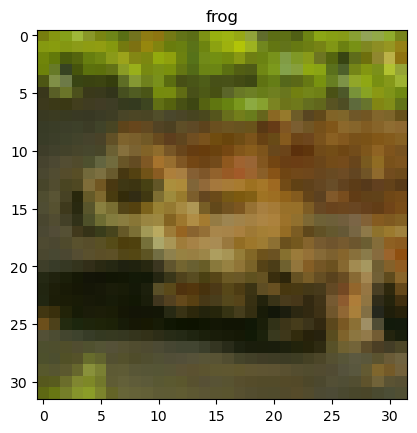

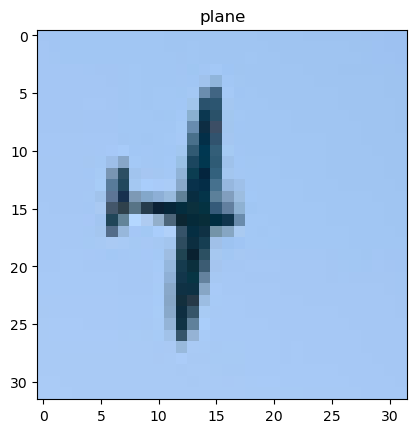

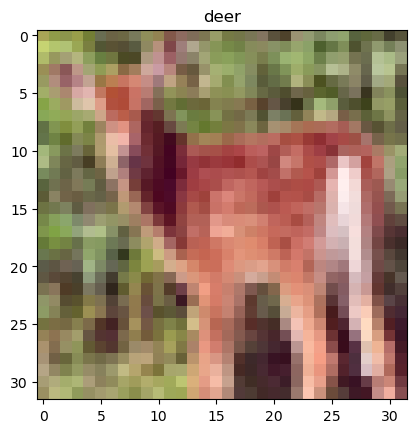

In [4]:
# Visualizes num_to_viz digits and labels with plt.matshow and plt.show. Notice how reshape is used to get the data into proper format for visualization.
# Note the use of reshape!
#----------------------------------------------------------------#
num_to_viz = 3
toPilImage = transforms.ToPILImage()

for i in range(num_to_viz):
    j = random.randrange(50000)
    # unnormalize image
    image_to_viz = toPilImage(train_set[j][0] / 2 + 0.5)
    image_to_viz_label = train_set[j][1]
    plt.imshow(image_to_viz)
    plt.title(classes[image_to_viz_label])
    plt.show()
#----------------------------------------------------------------#

So far, this has been similar to the MNIST-DNN Project. When does it diverge? Well first we are going to make a DNN to try and classify these fashion images and then check the accuracy we get. Then we will compare it to the accuracy of a CNN on the **exact same data**.

In [5]:
# Goal: Make a neural network that can classify CIFAR-10
# No example network provided this time! Refer back to Unit 2 if youre stuck on how to make a DNN

## TODO: Create the following required NN class that can work with CIFAR-10 data, and then instantiate a model

#!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!#
###! MAKE SURE YOUR NEURAL NETWORK HAS AT LEAST 3 HIDDEN LAYERS AND DOES NOT HAVE HARDCODED LAYER SIZE VALUES!###
#!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!#

# CIFAR10_DNN: The name of your class
# model: An instance of CIFAR10_DNN

class CIFAR10_DNN(nn.Module):
    def __init__(self, input_shape, hidden_layers, num_classes):
        super().__init__()

        # Structure
        self.input_dim = input_shape
        self.hidden_layers = hidden_layers
        self.num_classes = num_classes

        # Layers
        layers = []
        last_layer = self.input_dim
        for curr in hidden_layers:
            layers.append(nn.Linear(last_layer, curr))
            layers.append(nn.ReLU())
            last_layer = curr

        layers.append(nn.Linear(last_layer, num_classes))

        self.network = nn.Sequential(*layers)

    def forward(self, x):
        x = x.view(x.size(0), -1)
        return self.network(x)

hidden_layers = [512, 256, 128, 64]
num_classes = len(classes)
model = CIFAR10_DNN(3072, hidden_layers, num_classes) 
"""
Tips:
- Think about what input and output sizes you want
- Hidden layers can be most anything, just make sure to reduce gradually
- Remind yourself what activations are and why they are useful
- Make sure to name your class "CIFAR10_DNN"
- Instead of hardcoding the numbers in for the layer sizes, make them passable parameters
- Make sure to actually make your model using model = CIFAR10_DNN(...) as the last line
"""

'\nTips:\n- Think about what input and output sizes you want\n- Hidden layers can be most anything, just make sure to reduce gradually\n- Remind yourself what activations are and why they are useful\n- Make sure to name your class "CIFAR10_DNN"\n- Instead of hardcoding the numbers in for the layer sizes, make them passable parameters\n- Make sure to actually make your model using model = CIFAR10_DNN(...) as the last line\n'

__Now your task will be to train and test the model__. Again, refer back to **unit 2** if any of this has slipped from your memory (that is totally fine). However, don't get discouraged at the difficulty because none of this is new! You did it before and can do it again. We have provided the loss function and optimizer, but nothing else.

In [6]:
# Feel free to mess with the code in here once you have finished the project to see what effect it will have.
# For now, though, simply read and accept the syntax as-is
#----------------------------------------------------------------#
loss_func = nn.CrossEntropyLoss() # Mean Squared Error
optimizer = torch.optim.Adam(model.parameters(), lr=0.001) # Adaptive Optimizer
#----------------------------------------------------------------#

## TODO: Implement the training loop for your model. Reference unit 2 example if stuck.
num_epochs = 3
n_total_steps = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = images.reshape(-1, 3*32*32)
        outputs = model(images)
        loss = loss_func(outputs, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1) % 100 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Step[{i+1}/{n_total_steps}], Loss: {loss.item():.4f}')

Epoch [1/3], Step[100/2500], Loss: 2.0042
Epoch [1/3], Step[200/2500], Loss: 1.5101
Epoch [1/3], Step[300/2500], Loss: 2.2476
Epoch [1/3], Step[400/2500], Loss: 1.9462
Epoch [1/3], Step[500/2500], Loss: 1.9405
Epoch [1/3], Step[600/2500], Loss: 1.5031
Epoch [1/3], Step[700/2500], Loss: 1.6374
Epoch [1/3], Step[800/2500], Loss: 1.3874
Epoch [1/3], Step[900/2500], Loss: 1.8132
Epoch [1/3], Step[1000/2500], Loss: 1.7988
Epoch [1/3], Step[1100/2500], Loss: 1.6896
Epoch [1/3], Step[1200/2500], Loss: 1.3701
Epoch [1/3], Step[1300/2500], Loss: 1.5414
Epoch [1/3], Step[1400/2500], Loss: 1.3767
Epoch [1/3], Step[1500/2500], Loss: 1.9079
Epoch [1/3], Step[1600/2500], Loss: 1.4684
Epoch [1/3], Step[1700/2500], Loss: 1.4319
Epoch [1/3], Step[1800/2500], Loss: 1.5651
Epoch [1/3], Step[1900/2500], Loss: 1.4543
Epoch [1/3], Step[2000/2500], Loss: 1.9017
Epoch [1/3], Step[2100/2500], Loss: 1.8387
Epoch [1/3], Step[2200/2500], Loss: 1.6432
Epoch [1/3], Step[2300/2500], Loss: 1.7564
Epoch [1/3], Step[24

Here is the testing loop again. Run it to see how your accuracy is!

Then run all your code and see what your **final accuracy** is!

In [7]:
# Note the use of torch.no_grad() and torch.max(). Be sure you know what they are doing
#----------------------------------------------------------------#
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 3*32*32)
        outputs = model(images)
        # max returns (value ,index)
        _, predicted = torch.max(outputs.data, 1)
        n_samples += labels.size(0)
        n_correct += (predicted == labels).sum().item()
    acc = 100.0 * n_correct / n_samples
    print(f'Accuracy of the network on the 10000 test images: {acc} %')
#----------------------------------------------------------------#

Accuracy of the network on the 10000 test images: 50.05 %


Expected accuracy: ~50%

Great job! We have made a DNN classifier for CIFAR-10. Hopefully you are comfortable making models now, **since you will now be making a CNN!**

Let's see if the CNN's architectural differences will allow it to score higher than a standard DNN.

Check out these resources. If you get stuck, look at the third resource. We will do something similar:
- [Conv2d Documentation](https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html)
- [F_MNIST with a CNN Tutorial](https://medium.com/@nutanbhogendrasharma/pytorch-convolutional-neural-network-with-mnist-dataset-4e8a4265e118)
- [Training a Classifier](https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html)

In [12]:
# Goal: Make a convolutional neural network that can classify CIFAR-10
# Provided below is a syntactical example of a CNN, study it and try and make one that will fit CIFAR-10

class CNN_EXAMPLE(nn.Module):
    def __init__(self):
        super(CNN_EXAMPLE, self).__init__()

        # Structure
        input_channels = 1 # Represents the number of color channels an image has. We are working with grayscale so it will be 1. RGB would be 3.

        # Convolutional Layers
        self.conv_l1 = nn.Conv2d(in_channels=input_channels, out_channels=5, kernel_size=(3, 3), stride=1)

        # Feedforward Layers
        self.ff1 = nn.Linear(845, 10) # The input number selected here is dependent on the size of the output from the previous layers. You can do some printing of shapes to figure out what it should be.

        # Maxpool Layers
        self.maxpool = nn.MaxPool2d(kernel_size=(2,2), stride=2)

        # Activations
        self.sigmoid = nn.Sigmoid()
        self.softmax = nn.Softmax()


    def forward(self, input):
        x = self.conv_l1(input)
        x = self.sigmoid(x)
        x = self.maxpool(x)

        x = torch.flatten(x, 1)

        print(x.detach().numpy().shape) # Can help you find the necessary input size for the feedforward part!!!

        output = self.ff1(x)

        return output

## TODO: Create the following required NN class that can work with CIFAR-10 data, and then instantiate a model

#!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!#
###! MAKE SURE YOUR NEURAL NETWORK HAS AT LEAST 2 CONVOLUTION LAYERS! THE EXAMPLE ONLY HAS 1 !###
#!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!#

# CIFAR10_CNN: The name of your class
# cnn_model: An instance of CIFAR10_CNN
class CIFAR10_CNN(nn.Module):
    def __init__(self, input_channels, num_classes, conv_channels, dense_layers):
        super().__init__()

        # Convolutional Layers
        conv_layers = []
        conv_in = input_channels
        for conv_out in conv_channels:
            conv_layers.append(nn.Conv2d(conv_in, conv_out, kernel_size=5, 
                                         stride=1, padding=2))
            conv_layers.append(nn.ReLU())
            conv_layers.append(nn.MaxPool2d(2))
            conv_in = conv_out
        self.features = nn.Sequential(*conv_layers)

        # dense Layers
        output_layers = [nn.Flatten()]
        for i in range(len(dense_layers) - 1):
            output_layers.append(nn.Linear(dense_layers[i], dense_layers[i+1]))
            output_layers.append(nn.ReLU())
        output_layers.append(nn.Linear(dense_layers[-1], num_classes))
        self.classifier = nn.Sequential(*output_layers)

    def forward(self, x):
        x = self.features(x)
        x = self.classifier(x)
        return x

num_classes = len(classes)
convolutional_channels = (32, 64, 128, 256) # Channels depth
dense_layers = (1024, 512, 256, 128)
cnn_model = CIFAR10_CNN(3, num_classes, convolutional_channels, dense_layers)
"""
Tips:
- The transition from convolutional to linear layers is tough
    - Print out the shape of the object right before it is supposed to go into the linear layer to find out how big the layer input size should be
    - **You may need to make the training loop in advance to do this**
- When you flatten, do it exactly as shown in the example (x = torch.flatten(x, 1)) to ensure you flatten across the right dimension
- Ignore the first dimension when printing out the shape of x before flattening (as shown above in the example), since it is the batch size
- Make sure to name your class "CIFAR10_CNN"
- Instead of hardcoding the numbers in for the input channels and output size, make them passable parameters
- Make sure to actually make your model using f_model = CIFAR10_CNN(...) as the last line
- Our images are in RGB, so the first conv layer should have 3 input channels!
"""


'\nTips:\n- The transition from convolutional to linear layers is tough\n    - Print out the shape of the object right before it is supposed to go into the linear layer to find out how big the layer input size should be\n    - **You may need to make the training loop in advance to do this**\n- When you flatten, do it exactly as shown in the example (x = torch.flatten(x, 1)) to ensure you flatten across the right dimension\n- Ignore the first dimension when printing out the shape of x before flattening (as shown above in the example), since it is the batch size\n- Make sure to name your class "CIFAR10_CNN"\n- Instead of hardcoding the numbers in for the input channels and output size, make them passable parameters\n- Make sure to actually make your model using f_model = CIFAR10_CNN(...) as the last line\n- Our images are in RGB, so the first conv layer should have 3 input channels!\n'

Below is where you should make your training loop. It will be very similar to the DNN training loop **with some slight alterations**.

In [14]:
# Feel free to mess with the code in here once you have finished the project to see what effect it will have.
# For now, though, simply read and accept the syntax as-is
#----------------------------------------------------------------#
loss_func = nn.CrossEntropyLoss() # Mean Squared Error
# You're allowed to play with the learning rate here
optimizer = torch.optim.Adam(cnn_model.parameters(), lr=0.0007) # Adaptive Optimizer
#----------------------------------------------------------------#

## TODO: Implement the training loop for your model
num_epochs = 3
n_total_steps = len(train_loader)
for epoch in range(num_epochs): 
    cnn_model.train()
    for i, (images, labels) in enumerate(train_loader): 
        outputs = cnn_model(images)
        loss = loss_func(outputs, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step() 

        if (i+1) % 100 == 0:
             print (f'Epoch [{epoch+1}/{num_epochs}], Step[{i+1}/{n_total_steps}], Loss: {loss.item():.4f}')
"""
Tips:
- Is there any need to reshape at all? Think about what a convolution acts on dimension-wise
- Everything except for the thing mentioned above will be the same!
"""

Epoch [1/3], Step[100/2500], Loss: 2.1881
Epoch [1/3], Step[200/2500], Loss: 2.1825
Epoch [1/3], Step[300/2500], Loss: 2.0457
Epoch [1/3], Step[400/2500], Loss: 1.6666
Epoch [1/3], Step[500/2500], Loss: 1.8506
Epoch [1/3], Step[600/2500], Loss: 1.9849
Epoch [1/3], Step[700/2500], Loss: 2.0589
Epoch [1/3], Step[800/2500], Loss: 1.6227
Epoch [1/3], Step[900/2500], Loss: 1.4318
Epoch [1/3], Step[1000/2500], Loss: 1.6251
Epoch [1/3], Step[1100/2500], Loss: 1.5169
Epoch [1/3], Step[1200/2500], Loss: 1.5972
Epoch [1/3], Step[1300/2500], Loss: 1.1286
Epoch [1/3], Step[1400/2500], Loss: 1.7104
Epoch [1/3], Step[1500/2500], Loss: 1.7085
Epoch [1/3], Step[1600/2500], Loss: 1.5690
Epoch [1/3], Step[1700/2500], Loss: 1.3791
Epoch [1/3], Step[1800/2500], Loss: 1.1496
Epoch [1/3], Step[1900/2500], Loss: 1.1570
Epoch [1/3], Step[2000/2500], Loss: 1.0481
Epoch [1/3], Step[2100/2500], Loss: 1.1347
Epoch [1/3], Step[2200/2500], Loss: 1.6244
Epoch [1/3], Step[2300/2500], Loss: 1.3484
Epoch [1/3], Step[24

'\nTips:\n- Is there any need to reshape at all? Think about what a convolution acts on dimension-wise\n- Everything except for the thing mentioned above will be the same!\n'

Here is the testing loop again. Run it to see how your accuracy is!

Then run all your code and see what your **final accuracy** is!

In [15]:
# Note the use of torch.no_grad() and torch.max(). Be sure you know what they are doing
#----------------------------------------------------------------#
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    for images, labels in test_loader:
        outputs = cnn_model(images)
        # max returns (value ,index)
        _, predicted = torch.max(outputs.data, 1)
        n_samples += labels.size(0)
        n_correct += (predicted == labels).sum().item()
    acc = 100.0 * n_correct / n_samples
    print(f'Accuracy of the network on the 10000 test images: {acc} %')
#----------------------------------------------------------------#

Accuracy of the network on the 10000 test images: 69.92 %


Expected accuracy ~70%

Looks like the CNN did do better! Feel free to mess with the parameters to see if you can get a better score. **Note that CNNs are more finnicky than DNNs, so your score may tank sometimes**.

### Congratulations on completing the project! Check your results with the notebook in the `answers` directory and then send your final accuracy to your club/channel/mentor!